### IS727272 - Cordero Hernández, Marco Ricardo

# M3_1 Limpieza de Datasets, Audit Risk

El dataset de Audit Risk (riesgos para auditoría) recopila información de riesgos tanto históricos como actuales. Al ser este factor el riesgo primordial que idealmente debería prevenirse, la salida a evaluar será Risk (riesgo), la cual presenta valores booleanos: 0 = No, 1 = Sí.

## 1. Leer dataset y desplegar la información

In [1]:
#Importar las librerias a utilizar, pandas, numpy, seaborn y matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Leer el dataset
risk_ds = pd.read_csv('./Datasets/audit_risk.csv')

In [3]:
#Desplegar el dataset y observar sus características
risk_ds

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [4]:
#Desplegar la información del dataset
risk_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [5]:
risk_ds.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


## 2. Visualización del Dataset

### 2.1 Sustitución de valores nulos

In [6]:
# Analizar columnas con datos nulos
risk_ds.isna().sum(axis = 0)

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [7]:
# Sustituir por promedio de la misma columna
risk_ds['Money_Value'].fillna(value = risk_ds['Money_Value'].mean(), inplace = True)
risk_ds.isna().sum(axis = 0)['Money_Value']

0

(Dado que todos los valores ya son numéricos, no es necesario realizar una conversión a valores dicotómicos)

array([[<AxesSubplot:title={'center':'Sector_score'}>,
        <AxesSubplot:title={'center':'PARA_A'}>,
        <AxesSubplot:title={'center':'Score_A'}>,
        <AxesSubplot:title={'center':'Risk_A'}>,
        <AxesSubplot:title={'center':'PARA_B'}>],
       [<AxesSubplot:title={'center':'Score_B'}>,
        <AxesSubplot:title={'center':'Risk_B'}>,
        <AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'numbers'}>,
        <AxesSubplot:title={'center':'Score_B.1'}>],
       [<AxesSubplot:title={'center':'Risk_C'}>,
        <AxesSubplot:title={'center':'Money_Value'}>,
        <AxesSubplot:title={'center':'Score_MV'}>,
        <AxesSubplot:title={'center':'Risk_D'}>,
        <AxesSubplot:title={'center':'District_Loss'}>],
       [<AxesSubplot:title={'center':'PROB'}>,
        <AxesSubplot:title={'center':'RiSk_E'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'Prob'}>,
        <AxesSubplot:title={'center':'Risk_F

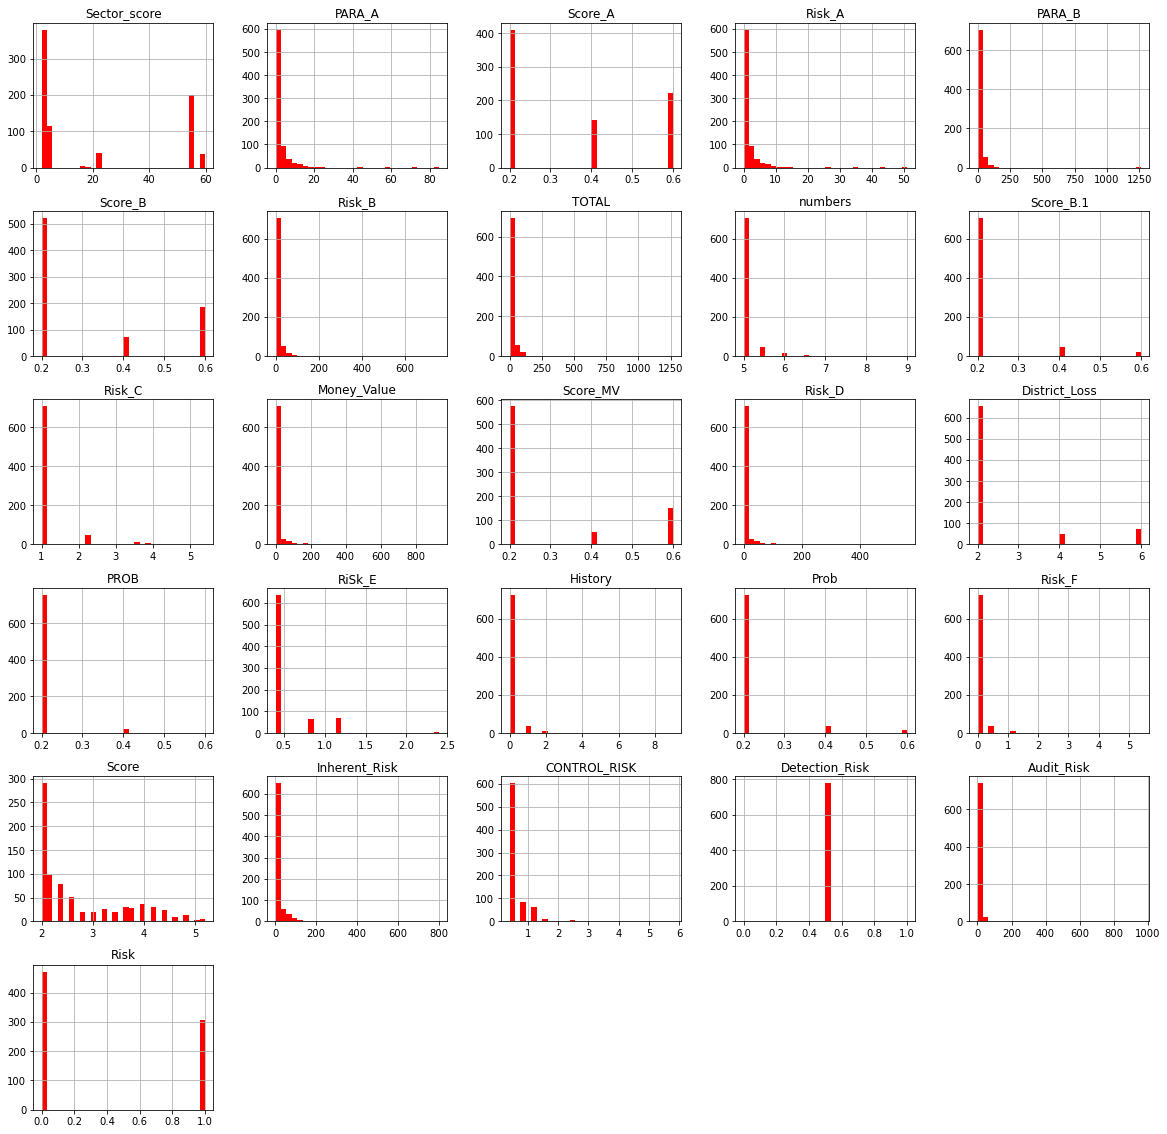

In [8]:
#Revisar los histogramas de cada columna
#En cada gráfica visualizar aquéllas columnas donde se repita el mismo valor en todos los datos
risk_ds.hist(bins = 30, figsize = (20, 20), color = 'r')

In [9]:
# Como se puede observar, la única columna con valores idénticos es 'Detection_Risk'
risk_ds.drop(['Detection_Risk'], axis = 1, inplace = True)

In [10]:
risk_ds

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880,0


## 3. Análisis de las características (features) que más influyen en la salida 

In [11]:
# Conteo de elementos y sus riesgo respectivo

si_riesgo = risk_ds[risk_ds['Risk'] == 1]
no_riesgo = risk_ds[risk_ds['Risk'] == 0]

In [12]:
print('Total = ', len(risk_ds))
print('Elementos que representan riesgo = ', len(si_riesgo))
print('Porcentaje de elementos que representan riesgo = ', len(si_riesgo)/len(risk_ds)*100, '%')

print('Elementos que no representan riesgo = ', len(no_riesgo))
print('Porcentaje de elementos que no representan riesgo = ', len(no_riesgo)/len(risk_ds)*100, '%')

Total =  776
Elementos que representan riesgo =  305
Porcentaje de elementos que representan riesgo =  39.3041237113402 %
Elementos que no representan riesgo =  471
Porcentaje de elementos que no representan riesgo =  60.69587628865979 %


In [13]:
si_riesgo.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0
mean,8.281246,5.121379,0.485246,2.996276,26.786689,0.447213,15.868164,31.827412,5.168852,0.259016,...,0.214426,0.667541,0.262295,0.241967,0.135082,3.540984,41.951181,0.802623,17.594018,1.0
std,15.662242,8.317627,0.159188,5.027502,77.271891,0.181007,46.421837,78.341559,0.399647,0.118900,...,0.056677,0.406237,0.821216,0.102963,0.476399,0.770291,81.635951,0.634527,60.265935,0.0
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.200000,0.400000,1.014400,1.0
25%,2.370000,1.190000,0.400000,0.476000,0.830000,0.200000,0.166000,3.530000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.800000,7.264000,0.400000,1.907600,1.0
50%,3.410000,3.080000,0.600000,1.848000,7.630000,0.600000,3.604000,11.990000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,3.600000,19.372000,0.400000,5.389600,1.0
75%,3.890000,6.470000,0.600000,3.882000,38.320000,0.600000,22.992000,45.050000,5.000000,0.200000,...,0.200000,0.800000,0.000000,0.200000,0.000000,4.200000,52.758000,1.200000,15.683200,1.0
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,961.514400,1.0


In [14]:
no_riesgo.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.0
mean,27.892611,0.720446,0.264544,0.285635,0.447667,0.226327,0.160085,1.168113,5.002123,0.200849,...,0.200849,0.422930,0.002123,0.200425,0.000849,2.159660,1.964002,0.423779,0.416806,0.0
std,25.788593,0.894807,0.119910,0.524677,0.912499,0.084470,0.455666,1.301996,0.032547,0.013019,...,0.013019,0.093084,0.046078,0.009216,0.018431,0.284917,0.786556,0.094685,0.186206,0.0
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.280000,0.0
25%,2.370000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.230000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.483000,0.400000,0.296600,0.0
50%,21.610000,0.490000,0.200000,0.098000,0.001500,0.200000,0.000300,0.870000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.656000,0.400000,0.331200,0.0
75%,55.570000,1.000000,0.400000,0.400000,0.585000,0.200000,0.117000,1.505000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.042000,0.400000,0.423200,0.0
max,59.850000,5.200000,0.600000,3.120000,7.370000,0.600000,3.240000,7.370000,5.500000,0.400000,...,0.400000,0.800000,1.000000,0.400000,0.400000,3.600000,4.974000,0.800000,0.994800,0.0


<AxesSubplot:>

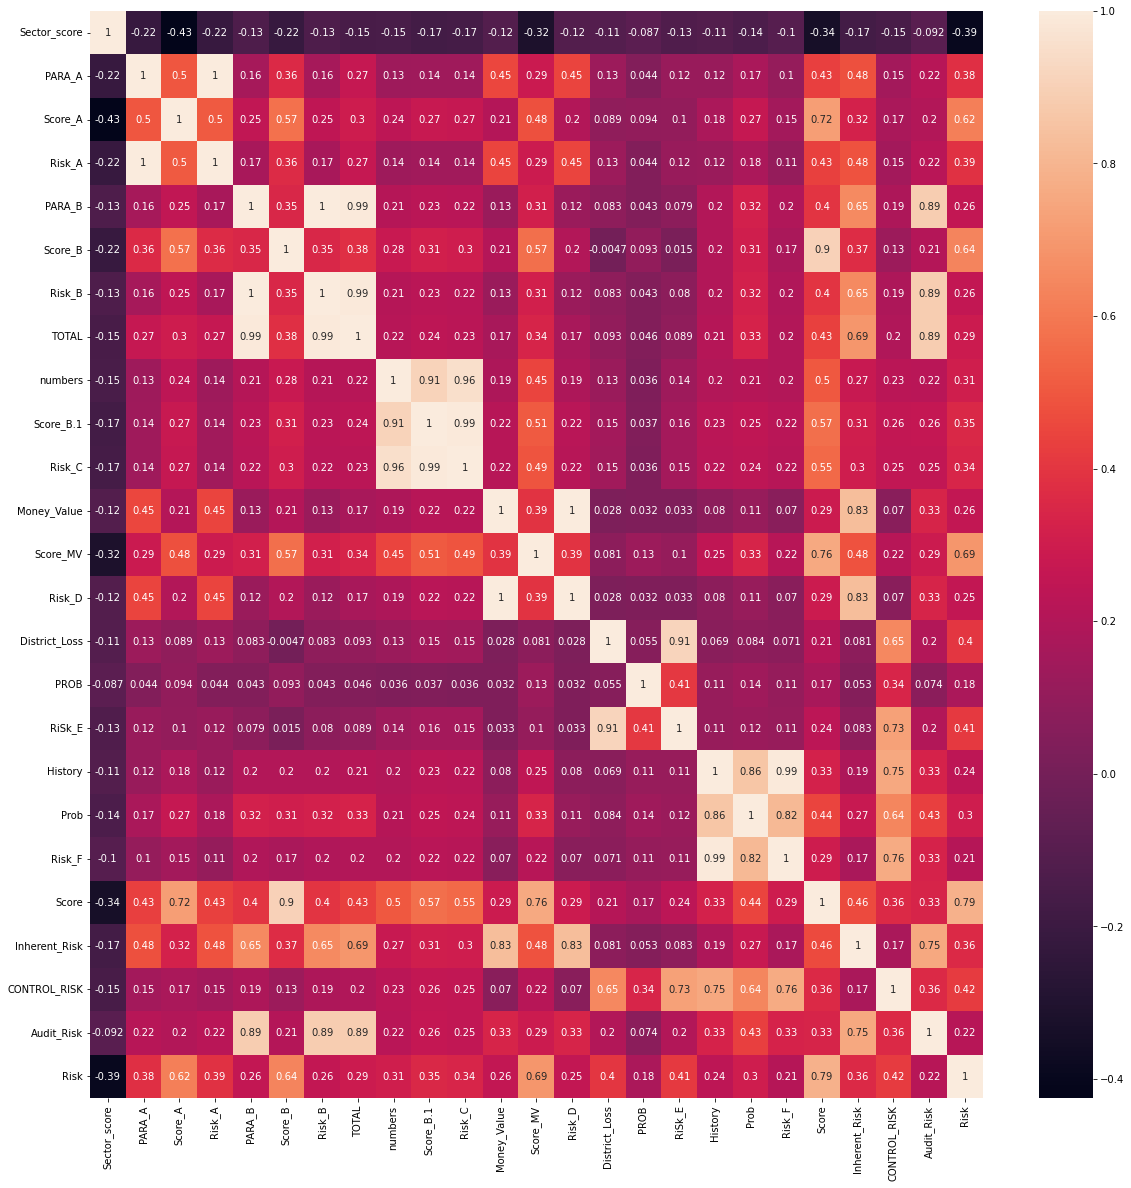

In [15]:
# Análisis de correlación

correlations = risk_ds.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

<AxesSubplot:xlabel='Score', ylabel='count'>

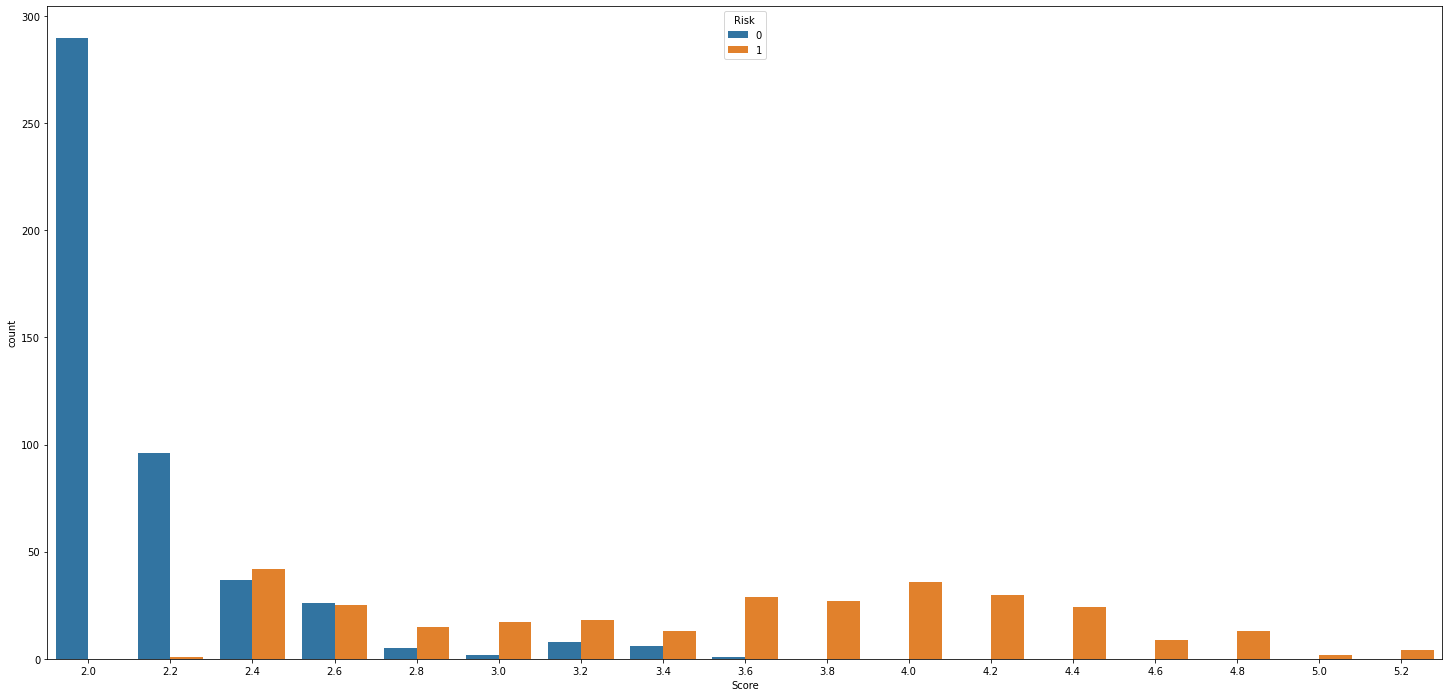

In [16]:
# Histograma relación puntuación a riesgo inherente
plt.figure(figsize = (25, 12))
sns.countplot(x = 'Score', hue = 'Risk', data = risk_ds)

<AxesSubplot:xlabel='District_Loss', ylabel='count'>

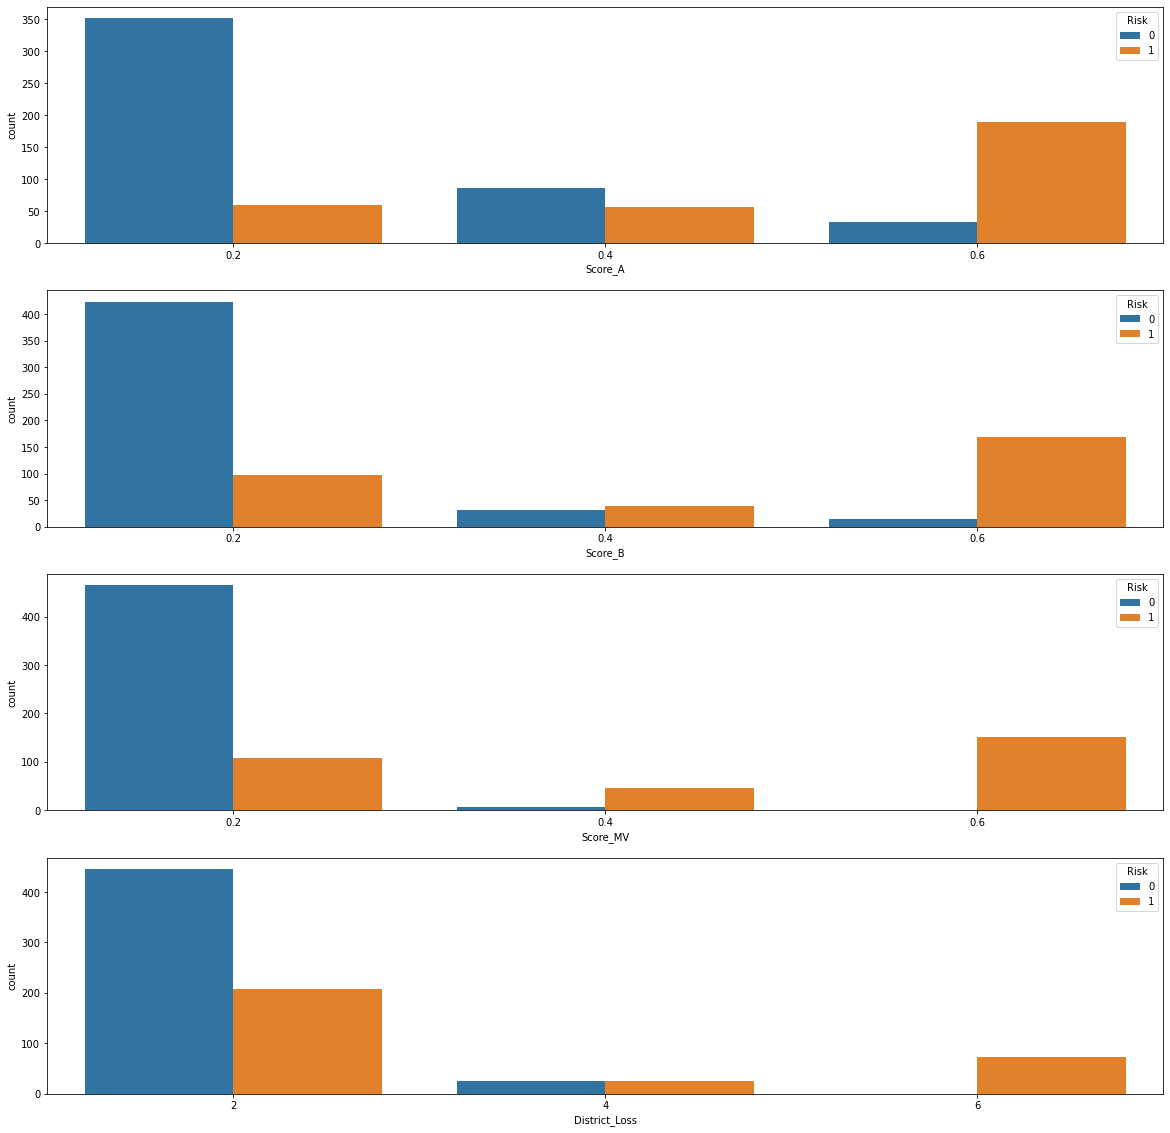

In [17]:
# Comparación con distintos features
plt.figure(figsize = (20, 20))
plt.subplot(411)
sns.countplot(x = 'Score_A', hue = 'Risk', data = risk_ds)
plt.subplot(412)
sns.countplot(x = 'Score_B', hue = 'Risk', data = risk_ds)
plt.subplot(413)
sns.countplot(x = 'Score_MV', hue = 'Risk', data = risk_ds)
plt.subplot(414)
sns.countplot(x = 'District_Loss', hue = 'Risk', data = risk_ds)

In [18]:
#ANOTACIONES

# Los scores están segmentados de manera similar, ya que los histogramas reflejan similitudes
# Inclusive las pérdidas de distrito son bastante similares a las mismas puntuaciones
# De alguna manera, entre más alta la puntuación, mayor será la probabilidad de riesgo de fraude
# Lamentablemente, la descripción de los datos no se encuentre disponible, por lo cual es difícil caracterizar los resultados

Text(0.5, 0, 'Riesgo E')

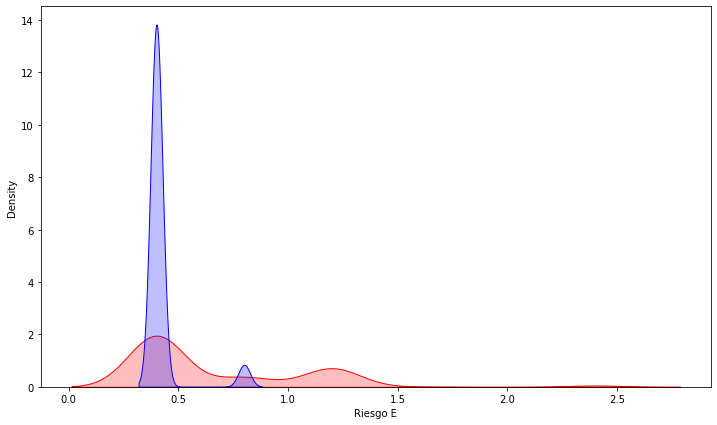

In [19]:
plt.figure(figsize = (12, 7))
sns.kdeplot(si_riesgo['RiSk_E'], shade = True, color = 'r')
sns.kdeplot(no_riesgo['RiSk_E'], shade = True, color = 'b')

plt.xlabel('Riesgo E')

<AxesSubplot:xlabel='Score_MV', ylabel='History'>

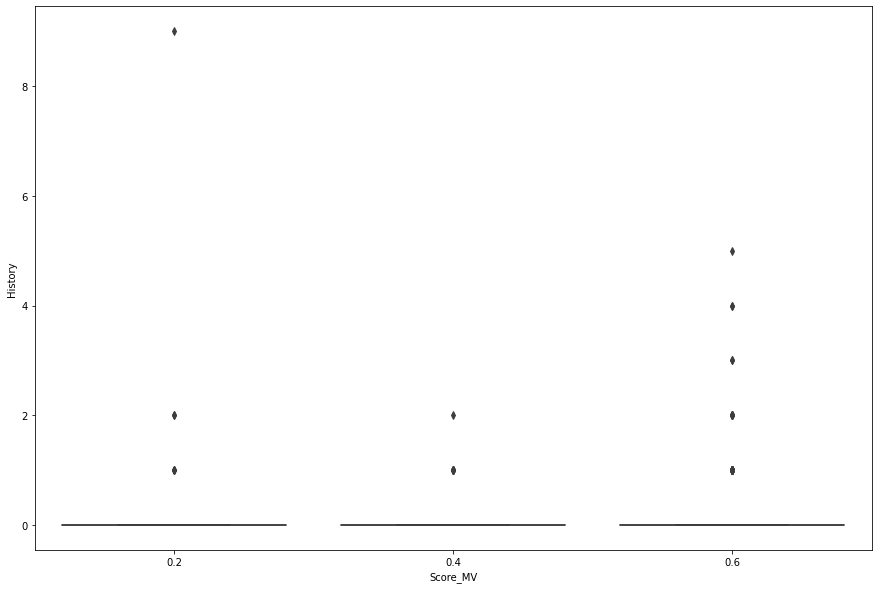

In [20]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'Score_MV', y = 'History', data = risk_ds)
# En este punto me di cuenta que el dataset no es muy bueno, pero ya no hay vuelta atrás

# 4. Crear los datasets de entrenamiento y prueba

In [21]:
risk_ds.head(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0


In [22]:
risk_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   Score_A        776 non-null    float64
 4   Risk_A         776 non-null    float64
 5   PARA_B         776 non-null    float64
 6   Score_B        776 non-null    float64
 7   Risk_B         776 non-null    float64
 8   TOTAL          776 non-null    float64
 9   numbers        776 non-null    float64
 10  Score_B.1      776 non-null    float64
 11  Risk_C         776 non-null    float64
 12  Money_Value    776 non-null    float64
 13  Score_MV       776 non-null    float64
 14  Risk_D         776 non-null    float64
 15  District_Loss  776 non-null    int64  
 16  PROB           776 non-null    float64
 17  RiSk_E         776 non-null    float64
 18  History   

(En este caso, no se cuenta con datos categóricos, por lo cual no es necesaria su transformación)

In [23]:
# Aparentemente, LOCATION_ID cuenta únicamente con enteros, sin embargo, contiene algunos strings
r_cat = risk_ds[['LOCATION_ID']]
r_cat

,LOCATION_ID
0,23
1,6
2,6
3,6
4,6
...,...
771,9
772,16
773,14
774,18


In [24]:
r_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LOCATION_ID  776 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [25]:
# Transformar a OneHot
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
r_cat = ohe.fit_transform(r_cat).toarray()
r_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
r_cat.shape

(776, 45)

In [27]:
# Extraer datos numéricos y categóricos (omisibles, ya que no hay del todo)
r_numerical = risk_ds._get_numeric_data()
r_categories = risk_ds.drop(columns = r_numerical.columns)
r_numerical

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.3156,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880,0


In [28]:
r_numerical.shape

(776, 25)

In [29]:
# Convertir a DataFrame para manipulación y concatenación posterior
r_cat = pd.DataFrame(r_cat)
r_cat

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Se eliminará la feature de riesgo, ya que esta será la salida

r_numerical = r_numerical.drop('Risk', axis = 1)
r_numerical

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.3156
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880


In [31]:
# Unir conversiones

r_all = pd.concat([r_cat, r_numerical], axis = 1)
r_all

,0,1,2,3,4,5,6,7,8,9,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.3156
772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.3136
773,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.2912
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.2880


## Escalamiento de datos de la matriz X

In [32]:
# Función MinMaxScaler de sklearn.preprocessing para hacer un escalamiento de mi matriz X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(r_all)
x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.96904716e-03, 0.00000000e+00, 1.49266402e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.44274887e-03, 0.00000000e+00, 2.40107928e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85031918e-04, 0.00000000e+00, 3.07937377e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.00120771e-05, 0.00000000e+00, 1.16516845e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.00086265e-05, 0.00000000e+00, 8.32263182e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.00138024e-05, 0.00000000e+00, 1.33162109e-05]])

In [33]:
xdf = pd.DataFrame(x)
xdf.describe()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.014175,0.033505,0.060567,0.045103,0.025773,0.045103,0.067010,0.001289,0.020619,0.087629,...,0.126289,0.015464,0.059536,0.011598,0.041881,0.009927,0.219555,0.020354,0.031978,0.007166
std,0.118289,0.180068,0.238688,0.207664,0.158560,0.207664,0.250201,0.035898,0.142195,0.282937,...,0.307170,0.093770,0.145156,0.059003,0.169967,0.056636,0.268413,0.068437,0.082330,0.040227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000229,0.000000,0.000038
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.001018,0.000000,0.000287
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390625,0.011581,0.000000,0.003090
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
#Obtener la salida original

y = risk_ds['Risk']
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 776, dtype: int64